In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import distance
import os
import warnings
import sklearn as sk

In [7]:
#testando o banco de dados
dataset = pd.read_csv('heart.csv')
dataset.head()



,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [26]:
counts = dataset['output'].value_counts()
print(counts)

output
1    165
0    138
Name: count, dtype: int64


C:\Users\iantr\AppData\Local\Temp\ipykernel_2392\893391912.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='output', data=dataset, palette='hls')


<Axes: xlabel='output', ylabel='count'>

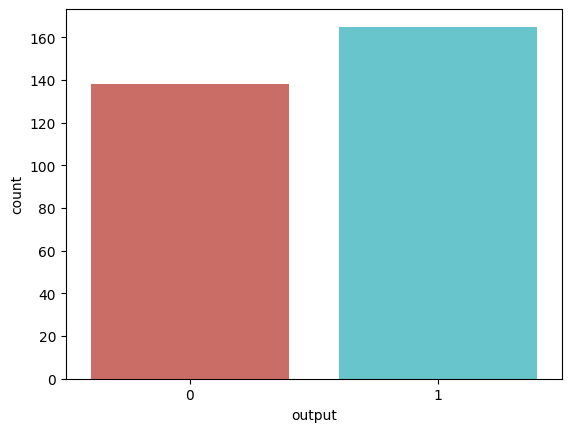

In [27]:
sns.countplot(x='output', data=dataset, palette='hls')

In [8]:
#verificando se há valores nulos
dataset.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [9]:

#separando os dados em valores e labels
valores = dataset.drop('output', axis=1)
labels = dataset['output']

#normalizando os dados
data = (valores - np.mean(valores, axis=0)) / np.std(valores, axis=0)

#printando como demonstração
data.head(15)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922
5,0.290464,0.681005,-0.938515,0.478391,-1.048678,-0.417635,0.898962,-0.072018,-0.696631,-0.551783,-0.649113,-0.714429,-2.148873
6,0.180175,-1.468418,0.032031,0.478391,0.922521,-0.417635,-1.005832,0.146634,-0.696631,0.224643,-0.649113,-0.714429,-0.512922
7,-1.143291,0.681005,0.032031,-0.663867,0.323431,-0.417635,0.898962,1.021244,-0.696631,-0.896862,0.976352,-0.714429,1.123029
8,-0.260980,0.681005,1.002577,2.306004,-0.913400,2.394438,0.898962,0.540209,-0.696631,-0.465514,0.976352,-0.714429,1.123029
9,0.290464,0.681005,1.002577,1.049520,-1.512490,-0.417635,0.898962,1.064975,-0.696631,0.483451,0.976352,-0.714429,-0.512922


In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# lista com as métricas de distância a serem testadas
metrics = [distance.euclidean, distance.cityblock, distance.minkowski, distance.hamming]

# aqui separamos os dados em conjuntos de teste e treinamento
X_train, X_test, y_train, y_test = train_test_split(data, labels, random_state=0)

# lista com os valores de k a serem testados
k_values = list(range(1, 40))

# dicionário para armazenar as acurácias médias
dicionario = {}

for metric in metrics:
    accuracy_list = []
    
    for k in k_values:
        # cria o classificador KNN
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        
        # realiza a validação cruzada
        scores = cross_val_score(knn, X_train, y_train.ravel(), cv=5, scoring='accuracy')
        
        # cálculo da acurácia média para k vizinhos
        accuracy_mean = np.mean(scores)
        accuracy_list.append(accuracy_mean)
    
    dicionario[metric.__name__] = accuracy_list

for metric_name, accuracy_list in dicionario.items():
    print('Métrica de distância:', metric_name)
    for k, accuracy in zip(k_values, accuracy_list):
        print(f'k --> {k} --> AVERAGE = {accuracy:.3f}')
    print()


Métrica de distância: euclidean
k --> 1 --> AVERAGE = 0.714
k --> 2 --> AVERAGE = 0.749
k --> 3 --> AVERAGE = 0.780
k --> 4 --> AVERAGE = 0.784
k --> 5 --> AVERAGE = 0.806
k --> 6 --> AVERAGE = 0.807
k --> 7 --> AVERAGE = 0.793
k --> 8 --> AVERAGE = 0.807
k --> 9 --> AVERAGE = 0.811
k --> 10 --> AVERAGE = 0.824
k --> 11 --> AVERAGE = 0.815
k --> 12 --> AVERAGE = 0.816
k --> 13 --> AVERAGE = 0.802
k --> 14 --> AVERAGE = 0.824
k --> 15 --> AVERAGE = 0.829
k --> 16 --> AVERAGE = 0.829
k --> 17 --> AVERAGE = 0.833
k --> 18 --> AVERAGE = 0.837
k --> 19 --> AVERAGE = 0.824
k --> 20 --> AVERAGE = 0.833
k --> 21 --> AVERAGE = 0.820
k --> 22 --> AVERAGE = 0.829
k --> 23 --> AVERAGE = 0.837
k --> 24 --> AVERAGE = 0.829
k --> 25 --> AVERAGE = 0.837
k --> 26 --> AVERAGE = 0.829
k --> 27 --> AVERAGE = 0.837
k --> 28 --> AVERAGE = 0.824
k --> 29 --> AVERAGE = 0.842
k --> 30 --> AVERAGE = 0.837
k --> 31 --> AVERAGE = 0.833
k --> 32 --> AVERAGE = 0.833
k --> 33 --> AVERAGE = 0.833
k --> 34 --> AVERAGE

In [18]:
for metric_name, accuracy_list in dicionario.items():
    # encontra o maior valor de acurácia média e qual foi o k correspondente
    max_accuracy = max(accuracy_list)
    max_k = k_values[accuracy_list.index(max_accuracy)]
    
    
    # plota a acurácia média de cada método
    print(f'Métrica utilizada: {metric_name}')
    print(f'Maior acurácia média: {max_accuracy:.3f} (k = {max_k}) \n')

Métrica utilizada: euclidean
Maior acurácia média: 0.842 (k = 29) 

Métrica utilizada: cityblock
Maior acurácia média: 0.850 (k = 34) 

Métrica utilizada: minkowski
Maior acurácia média: 0.842 (k = 29) 

Métrica utilizada: hamming
Maior acurácia média: 0.842 (k = 27) 



In [24]:
from sklearn.metrics import accuracy_score

# Após encontrar os melhores hiperparâmetros e treinar o modelo KNN
best_metric = "cityblock"  
best_k = 34               

# Treine o modelo KNN com os melhores hiperparâmetros nos dados de treinamento
best_knn = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric)
best_knn.fit(X_train, y_train)

# Avalie o modelo no conjunto de teste
y_pred = best_knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

# Exiba a acurácia no conjunto de teste
print(f'Acurácia no Conjunto de Teste (k={best_k}, Métrica={best_metric}): {test_accuracy:.3f}')

Acurácia no Conjunto de Teste (k=34, Métrica=cityblock): 0.816


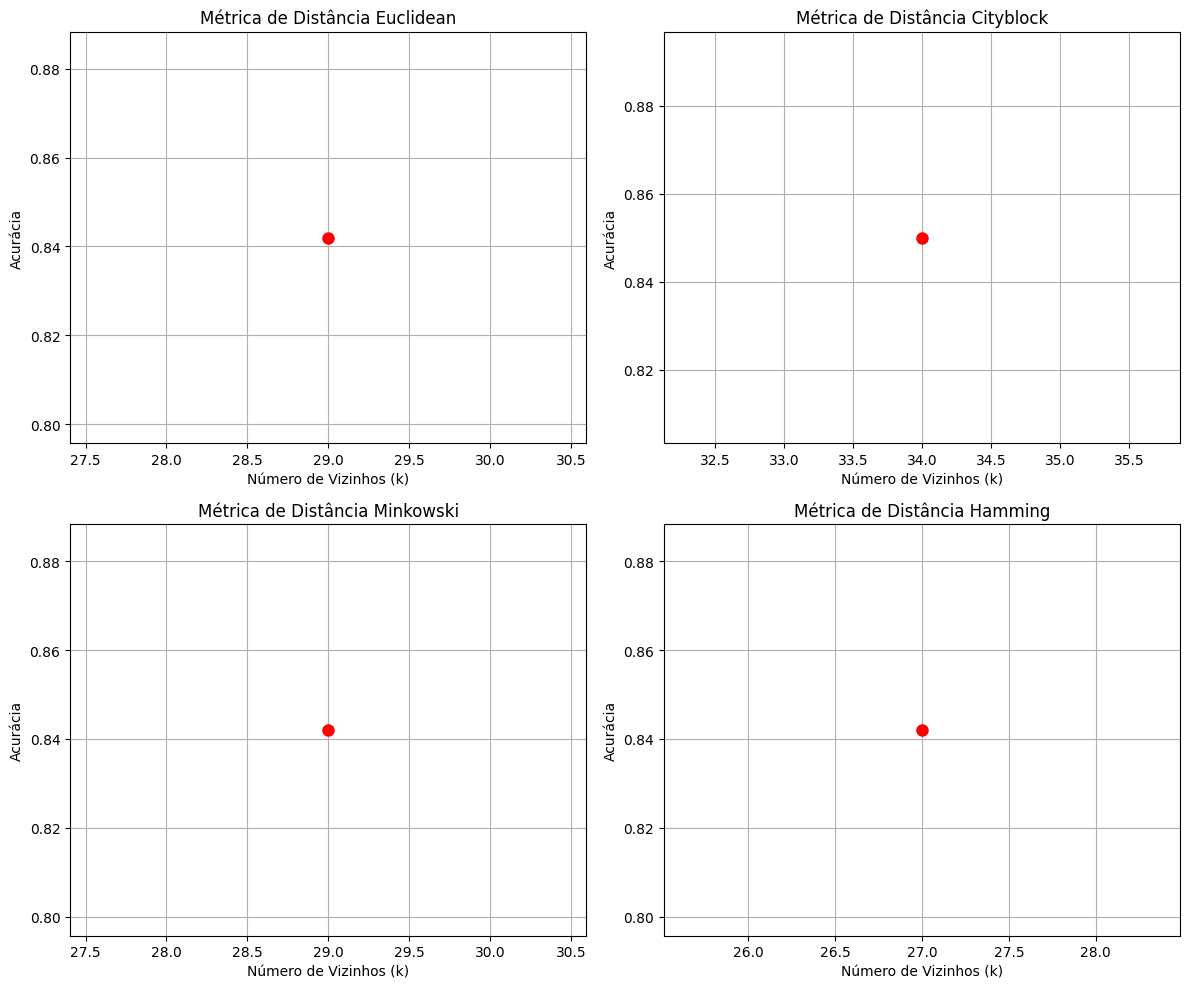

Melhores Modelos:
- Métrica: Cityblock, k: 9, Acurácia: 0.850
- Métrica: Hamming, k: 13, Acurácia: 0.842


In [29]:
import matplotlib.pyplot as plt

# Resultados
resultados = {
    "euclidean": {"k": 29, "acuracia": 0.842},
    "cityblock": {"k": 34, "acuracia": 0.850},
    "minkowski": {"k": 29, "acuracia": 0.842},
    "hamming": {"k": 27, "acuracia": 0.842},
}

# Plotar os resultados
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.flatten()

for i, (metrica, resultado) in enumerate(resultados.items()):
    k = resultado["k"]
    acuracia = resultado["acuracia"]
    
    # Plotar acurácia vs. k para cada métrica
    axes[i].plot(k, acuracia, 'ro', markersize=8)
    axes[i].set_title(f"Métrica de Distância {metrica.capitalize()}")
    axes[i].set_xlabel("Número de Vizinhos (k)")
    axes[i].set_ylabel("Acurácia")
    axes[i].grid(True)

plt.tight_layout()
plt.show()

# Melhores modelos
melhores_metricas = ["cityblock", "hamming"]
melhores_k = [9, 13]

print("Melhores Modelos:")
for metrica, k in zip(melhores_metricas, melhores_k):
    print(f"- Métrica: {metrica.capitalize()}, k: {k}, Acurácia: {resultados[metrica]['acuracia']:.3f}")


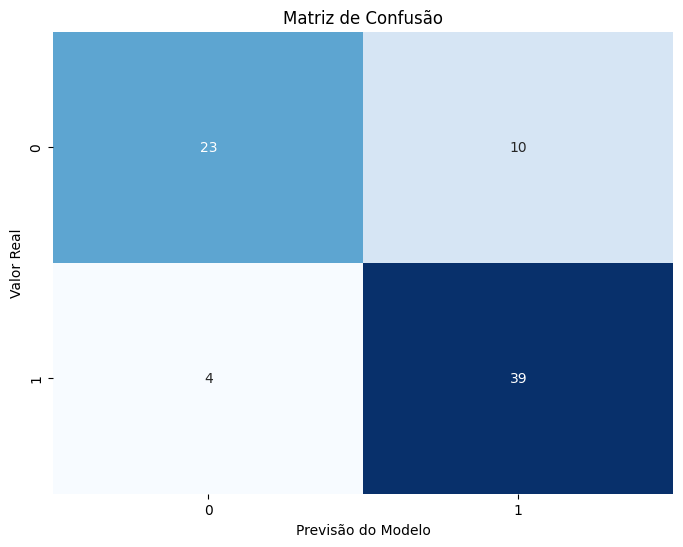

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula a matriz de confusão
confusion = confusion_matrix(y_test, y_pred)

# Exibe a matriz de confusão como um heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Previsão do Modelo')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão')
plt.show()
